In [53]:
import pandas as pd

data = pd.read_csv('data/data.csv')
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


## Preprocessing

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

data = data.drop('id', axis = 1)
categorical_cols = tuple(f'f_0{i}' if i < 10 else f'f_{i}' for i in range(7, 14))
numerical_cols = tuple(col for col in data.columns if col not in categorical_cols)
scale = make_column_transformer((OneHotEncoder(), categorical_cols))
data_one_hot = pd.DataFrame(scale.fit_transform(data).todense())
data_one_hot.columns = data_one_hot.columns.astype(str)
data_one_hot = data_one_hot[data_one_hot.columns[(data_one_hot.mean() > 0.1)]] #A bit of a hack, but it removes all of the sparse features from one hot encoding
data_norm = pd.concat([data[list(numerical_cols)], data_one_hot], axis=1)
data_norm.describe()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_14,f_15,f_16,...,f_23,f_24,f_25,f_26,f_27,f_28,2,3,4,5
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,0.003413,-0.002639,0.005404,...,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910,0.100622,0.109469,0.110173,0.105480
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,0.998940,1.001096,1.003277,...,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476,0.300830,0.312229,0.313107,0.307172
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,-4.377021,-4.535903,-4.182233,...,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151,0.000000,0.000000,0.000000,0.000000
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,-0.671810,-0.677757,-0.671055,...,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606,0.000000,0.000000,0.000000,0.000000
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,0.003536,-0.004299,0.006535,...,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319,0.000000,0.000000,0.000000,0.000000
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,0.678679,0.673859,0.680903,...,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516,0.000000,0.000000,0.000000,0.000000
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,4.490521,4.270708,4.157538,...,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150,1.000000,1.000000,1.000000,1.000000


The numerical attributes are only normalized (They already have more or less a normal distribution), the categorical ones are encoded using one hot encoding schema. To reduce the dimensionality of the data (which gets quite big because of the one hot encoding), we only keep the features that have a mean bigger than 0.1 (That includes only the derived features from one hot encoding which are quite sparse)

## Clustering

KMeans

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_norm)
cluster_range = range(2, 25)
db_index_scores = []
sil_scores = []

for k in cluster_range:
    model = KMeans(n_clusters=k).fit(X_train)
    res = model.predict(X_test)
    sil_score = silhouette_score(X_test, res, metric='correlation')
    db_index_score = davies_bouldin_score(X_test, res)
    sil_scores.append(sil_score)
    db_index_scores.append(db_index_score)
    print(f'Sil: {sil_score}, db: {db_index_score}, k: {k}')

/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.42677046581095046, db: 1.2114854377092146, k: 2


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.5097253501699331, db: 1.162572227925016, k: 3


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.5849991219745347, db: 1.102587822806199, k: 4


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.6512663908513662, db: 1.0263216480160815, k: 5


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.31869202964877913, db: 2.442442344350732, k: 6


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.31170530539076985, db: 2.5595345922408326, k: 7


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.307919304879948, db: 2.638218291395119, k: 8


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.3060660957948118, db: 2.687973837292403, k: 9


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sil: 0.23854821247912017, db: 3.3737233291605806, k: 10


/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

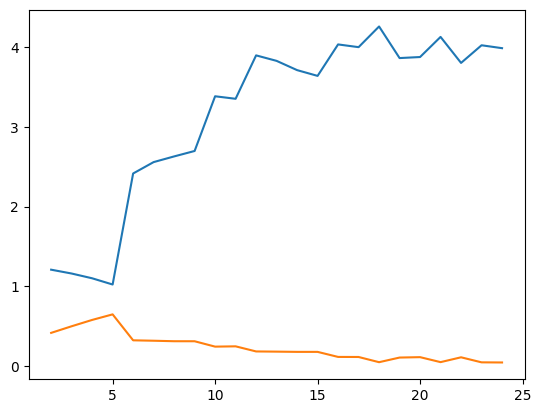

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
plt.plot(cluster_range, db_index_scores)
plt.plot(cluster_range, sil_scores)
plt.savefig('clusters_metrics_kmeans.png')

DBScan

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np

eps = 0.01
eps_step = 0.01
samples_range = range(2, 6)
db_index_scores = []
sil_scores = []
trunc_data, _ = train_test_split(data_norm, test_size = 0.8) # Kernel dies without reducing the amount of rows

for n_samples in samples_range:
    eps = 0.01
    while eps <= 0.1:
        model = DBSCAN(eps = eps, min_samples=n_samples, metric = 'cosine').fit(trunc_data)
        res = model.labels_
        if len(np.unique(res)) > 1:
            sil_score = silhouette_score(trunc_data, res, metric='cosine')
            db_index_score = davies_bouldin_score(trunc_data, res)
            sil_scores.append((eps, n_samples, sil_score))
            db_index_scores.append((eps, n_samples, db_index_score))
            print(f'Sil: {sil_score}, db: {db_index_score}, eps: {eps}, n_samples: {n_samples}')
        else:
            print("Wrong number of clusters")
        eps += eps_step

Sil: -0.612157177538098, db: 1.7171654844010782, eps: 0.01, n_samples: 2
Sil: 0.6074138193503347, db: 2.814246390936846, eps: 0.02, n_samples: 2
Sil: 0.6389537748221623, db: 1.3215036493380001, eps: 0.03, n_samples: 2
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.04, n_samples: 2
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.05, n_samples: 2
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.060000000000000005, n_samples: 2
Wrong number of clusters
Wrong number of clusters
Wrong number of clusters
Wrong number of clusters
Sil: -0.6074444044972813, db: 1.9977908709028558, eps: 0.01, n_samples: 3
Sil: 0.6074138193503347, db: 2.814246390936846, eps: 0.02, n_samples: 3
Sil: 0.6389537748221623, db: 1.3215036493380001, eps: 0.03, n_samples: 3
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.04, n_samples: 3
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.05, n_samples: 3
Sil: 0.6479761760544966, db: 1.025386667056388, eps: 0.060000000000000005, n_samples: 3

# Cluster numbers worth trying: 2 - 5 with 5 being seemingly the best

# DBSCAN: Anything with eps between 0.04 and 0.06 seems good, no matter the min_samples

## Model Training

In [55]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import train_test_split

kmeans_cluster_data = (2, 3, 4, 5)
dbscan_eps = (0.04, 0.05, 0.06)
dbscan_samples = (2, 3, 4, 5, 6)

kmeans_models = {}
dbscan_models = {}

for k in kmeans_cluster_data:
    kmeans_models[k] = KMeans(n_clusters=k).fit(data_norm)

trunc_data, _ = train_test_split(data_norm, train_size=0.1)
for n_samples in dbscan_samples:
    for eps in dbscan_eps:
        dbscan_models[(n_samples, eps)] = DBSCAN(eps = eps, min_samples = n_samples, metric='cosine').fit(trunc_data)

/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ekoha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Model visualisation

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cluster_sim(cluster1, cluster2, method = 'average', type = cosine_similarity):
    if method == 'average':
        average_cluster1 = cluster1.mean().values[:-1].reshape(1, -1)
        average_cluster2 = cluster2.mean().values[:-1].reshape(1, -1)
        return type(average_cluster1, average_cluster2)
    elif method == 'complete':
        sim_matrix = type(cluster1.values[:-1], cluster2.values[:-1])
        return np.min(sim_matrix)
    elif method == 'single':
        sim_matrix = type(cluster1.values[:-1], cluster2.values[:-1])
        return np.max(sim_matrix)
        

In [17]:
def similarity_matrix(data_with_cluster_info, similarity_method = 'average', similarity_type = cosine_similarity):
    clusters = np.unique(data_with_cluster_info['Cluster'])
    sim_matrix = np.diag(np.ones(len(clusters)))
    for cluster1_index in clusters:
        cluster1 = data_with_cluster_info[data_with_cluster_info['Cluster'] == cluster1_index]
        for cluster2_index in clusters:
            if cluster1_index >= cluster2_index:
                continue
            cluster2 = data_with_cluster_info[data_with_cluster_info['Cluster'] == cluster2_index]
            sim = cluster_sim(cluster1, cluster2, similarity_method, similarity_type)
            sim_matrix[cluster1_index][cluster2_index] = sim
            sim_matrix[cluster2_index][cluster1_index] = sim
    return sim_matrix



<Axes: >

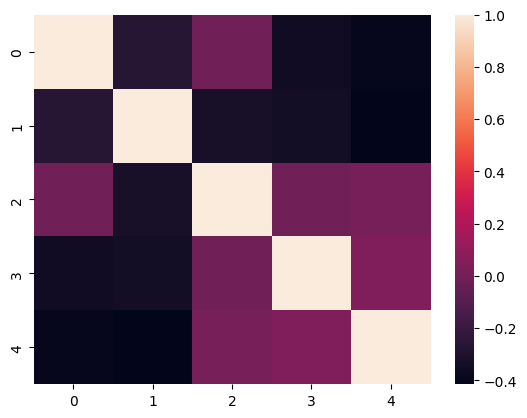

In [57]:
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances

data_plot = trunc_data.copy()
labels = kmeans_models[5].predict(data_plot)
data_plot['Cluster'] = labels
cluster1 = data_plot[data_plot['Cluster'] == 1]
cluster2 = data_plot[data_plot['Cluster'] == 2]
matrix = similarity_matrix(data_plot, similarity_type=lambda x, y: cosine_similarity(x, y))
sns.heatmap(matrix)

In [31]:
data_norm.std()**2

0     0.011822
1     0.013771
2     0.012554
3     0.014150
4     0.013647
5     0.012328
6     0.012579
7     0.012690
8     0.012922
9     0.014472
10    0.013246
11    0.012636
12    0.011285
13    0.012064
14    0.013596
15    0.012178
16    0.010944
17    0.010145
18    0.012426
19    0.009860
20    0.008059
21    0.012037
24    0.090498
25    0.097487
26    0.098036
27    0.094355
dtype: float64

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from itertools import compress

clf = LassoCV(cv=10)

sfm = SelectFromModel(clf, threshold=0.01)
labels = kmeans_models[5].predict(data_norm)
sfm.fit(data_norm, labels)
n_rows, n_features = sfm.transform(data_norm).shape

while n_features > 3:
    sfm.threshold += 0.01
    data_new = sfm.transform(data_norm)
    n_rows, n_features = data_new.shape
    
    feature_names = compress(data_norm.columns, sfm.get_support())
    print(f'Threshold={sfm.threshold:.2f} Num features: {n_features}, {list(feature_names)}')

feature1 = data_new[:, 0]
feature2 = data_new[:, 1]
feature3 = data_new[:, 2]

Threshold=0.02 Num features: 7, ['f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
Threshold=0.03 Num features: 6, ['f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
Threshold=0.04 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.05 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.06 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.07 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.08 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.09 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.10 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.11 Num features: 4, ['f_22', 'f_24', 'f_25', 'f_28']
Threshold=0.12 Num features: 3, ['f_24', 'f_25', 'f_28']


In [68]:
import matplotlib.pyplot as plt

def display_clustering(feature1, feature2, feature3, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    cols = ('c', 'y', 'r', 'g', 'b')
    for l in labels:
        ax.scatter(feature1[labels == l], feature2[labels == l], feature3[labels == l], c=cols[l%len(cols)])
    plt.show()

display_clustering(feature1, feature2, feature3, labels)

/home/ekoha/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f152ec4bb50> (for post_execute):


KeyboardInterrupt: 